In [2]:
import time
from datetime import datetime
import sys, asyncio
from pathlib import Path

if sys.platform == "win32":
    asyncio.set_event_loop_policy(asyncio.WindowsProactorEventLoopPolicy())

import chess
import chess.svg
import pandas as pd
from IPython.display import SVG, display

from prompt import generate_data_sample
from chess_explainer import ChessExplainer

In [3]:
engine_path = Path("./stockfish/stockfish-windows-x86-64-avx2.exe")
explainer = ChessExplainer(engine_path=engine_path, depth=18, multipv=15, think_time=0.2)

# Also import our data
# df = pd.read_parquet('prog_data/bestmove_fen_100.parquet')
df = pd.read_csv('prog_data/train_20k.csv')

In [3]:
# Import and shuffle our data
num_generations = 1000
df = df.sample(frac=1).reset_index(drop=True)

# Storage for our generated data
boards = []
prompts = []
answers = []

# Testing our prompt generations
for i in range(num_generations):
    print(f"[{i+1:<3}/{num_generations}]")
    fen = df.iloc[i]['FEN']
    board = chess.Board(fen)

    # Generate data and get train data formatted
    results, final_statement, best_move_uci = explainer.analyze_position(fen, generate_explanation=True)
    explanations = [move['explanation'] for move in results]
    sys, user, model = generate_data_sample(fen, explanations, final_statement, best_move_uci)

    full_prompt = sys + "\n" + user + "\n" + model
    
    # # Optionally can print our results
    # display(SVG(chess.svg.board(board=board, size=300)))
    # print(full_prompt)
    
    # Store the data
    boards.append(fen)
    prompts.append(full_prompt)
    answers.append(best_move_uci)

# Create output dataframe
df_out = pd.DataFrame({
    'board': boards,
    'prompt': prompts,
    'answer': answers
})

# Generate filename with timestamp and number of samples
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f'prog_data/explanation_traindata_{num_generations}_{timestamp}.parquet'

# Save to parquet
df_out.to_parquet(output_file, index=False)
print(f"\nSaved {len(df_out)} samples to {output_file}")

[1  /1000]
[2  /1000]
[3  /1000]
[4  /1000]
[5  /1000]
[6  /1000]
[7  /1000]
[8  /1000]
[9  /1000]
[10 /1000]
[11 /1000]
[12 /1000]
[13 /1000]
[14 /1000]
[15 /1000]
[16 /1000]
[17 /1000]
[18 /1000]
[19 /1000]
[20 /1000]
[21 /1000]
[22 /1000]
[23 /1000]
[24 /1000]
[25 /1000]
[26 /1000]
[27 /1000]
[28 /1000]
[29 /1000]
[30 /1000]
[31 /1000]
[32 /1000]
[33 /1000]
[34 /1000]
[35 /1000]
[36 /1000]
[37 /1000]
[38 /1000]
[39 /1000]
[40 /1000]
[41 /1000]
[42 /1000]
[43 /1000]
[44 /1000]
[45 /1000]
[46 /1000]
[47 /1000]
[48 /1000]
[49 /1000]
[50 /1000]
[51 /1000]
[52 /1000]
[53 /1000]
[54 /1000]
[55 /1000]
[56 /1000]
[57 /1000]
[58 /1000]
[59 /1000]
[60 /1000]
[61 /1000]
[62 /1000]
[63 /1000]
[64 /1000]
[65 /1000]
[66 /1000]
[67 /1000]
[68 /1000]
[69 /1000]
[70 /1000]
[71 /1000]
[72 /1000]
[73 /1000]
[74 /1000]
[75 /1000]
[76 /1000]
[77 /1000]
[78 /1000]
[79 /1000]
[80 /1000]
[81 /1000]
[82 /1000]
[83 /1000]
[84 /1000]
[85 /1000]
[86 /1000]
[87 /1000]
[88 /1000]
[89 /1000]
[90 /1000]
[91 /1000]

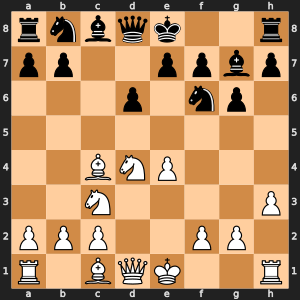

<|begin_of_text|>
<|start_header_id|>system<|end_header_id|>
You are a chess grandmaster currently playing a very strong opponent. Assume they will be playing optimally. 

Shortly you'll be provided with a board state by the user -- please analyze it and think through your possible moves.

You should refer to moves in UCI notation (e.g., d7d5) and should include your thinking in think tags (e.g., <think> your_thinking </think>) and your answer in answer tags (e.g., <answer> UCI_move </answer>). 

As a technique you may want to consider enumerating possible moves and simulating the likely trajectory that would ensue. <|eot_id|>
<|start_header_id|>user<|end_header_id|>
8| r n b q k . . r
7| p p . . p p b p
6| . . . p . n p .
5| . . . . . . . .
4| . . B N P . . .
3| . . N . . . . P
2| P P P . . P P .
1| R . B Q K . . R
   _ _ _ _ _ _ _ _
   A B C D E F G H

- It is Black’s turn to move.
- Castling rights: White can castle kingside, White can castle queenside, Black can castle kingside, Bl

In [11]:
# Test a random output
df = pd.read_parquet('prog_data/explanation_traindata_1k_cleaned.parquet').sample(frac=1).reset_index(drop=True)
display(SVG(chess.svg.board(board=chess.Board(df.iloc[0]['board']), size=300)))
print(df.iloc[0]['prompt'])
print(df.iloc[0]['answer'])